In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [56]:
X, y = make_blobs(10000, centers=4, random_state=42)

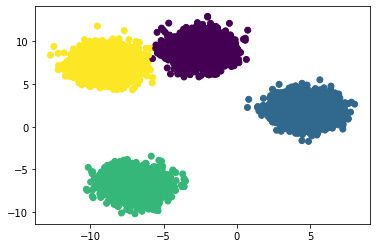

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [58]:
ohe = OneHotEncoder()

In [59]:
ohe.fit(y.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [60]:
ohe.categories_

[array([0, 1, 2, 3])]

In [61]:
y_hot = ohe.transform(y.reshape(-1, 1)).todense()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [63]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation="sigmoid", name="l1"))
model.add(Dense(4, activation="softmax", name="l2"))

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 5)                 15        
_________________________________________________________________
l2 (Dense)                   (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [66]:
model.fit(X_train, y_train, epochs=20)

Train on 6700 samples
Epoch 1/20
6700/6700 [==============================] - 1s 172us/sample - loss: 1.2292 - accuracy: 0.4367
Epoch 2/20
6700/6700 [==============================] - 1s 105us/sample - loss: 0.8966 - accuracy: 0.9042
Epoch 3/20
6700/6700 [==============================] - 1s 91us/sample - loss: 0.6611 - accuracy: 0.9963
Epoch 4/20
6700/6700 [==============================] - 1s 107us/sample - loss: 0.4742 - accuracy: 0.9987
Epoch 5/20
6700/6700 [==============================] - 1s 80us/sample - loss: 0.3355 - accuracy: 0.9994
Epoch 6/20
6700/6700 [==============================] - 1s 105us/sample - loss: 0.2358 - accuracy: 0.9994
Epoch 7/20
6700/6700 [==============================] - 1s 107us/sample - loss: 0.1649 - accuracy: 0.9996
Epoch 8/20
6700/6700 [==============================] - 1s 78us/sample - loss: 0.1154 - accuracy: 0.9996
Epoch 9/20
6700/6700 [==============================] - 0s 73us/sample - loss: 0.0812 - accuracy: 0.9997
Epoch 10/20
6700/6700 [=====

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.0036654772967890355, 0.9990909]